In [8]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Using backend: tensorflow.compat.v1

2022-05-13 16:28:29.111643: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-13 16:28:29.111684: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term



In [19]:
a = 10
b = 28
c = 8/3

In [20]:
geom = dde.geometry.TimeDomain(0, 1)

In [21]:
def ode_system(t, w):
    x, y, z = w[:, 0:1], w[:, 1:2], w[:, 2:]
    dx_t = dde.grad.jacobian(w, t, i=0)
    dy_t = dde.grad.jacobian(w, t, i=1)
    dz_t = dde.grad.jacobian(w, t, i=2)
    return [dx_t - a * (y - x), dy_t - x * (b - z) - y, dz_t - x * y - c * z]

In [22]:
ic1 = dde.icbc.IC(geom, lambda x: 1, lambda _, on_initial: on_initial, component=0)
ic2 = dde.icbc.IC(geom, lambda x: 1, lambda _, on_initial: on_initial, component=1)
ic3 = dde.icbc.IC(geom, lambda x: 1, lambda _, on_initial: on_initial, component=2)

In [23]:
data = dde.data.PDE(geom, ode_system, [ic1, ic2, ic3], 200, 2, num_test=500)

/home/Alejandro/.local/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+202=202. 
  warnings.warn("The balance properties of Sobol' points require "


In [24]:
net = dde.nn.FNN([1] + [40]*3 + [3], "tanh", "Glorot uniform")

In [25]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

Compiling model...
Building feed-forward neural network...
'build' took 0.081035 s



/home/Alejandro/.local/lib/python3.9/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/home/Alejandro/.local/lib/python3.9/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.509169 s



Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [5.90e+00, 4.55e+01, 1.06e-02, 1.00e+00, 1.00e+00, 1.00e+00]    [5.90e+00, 4.54e+01, 1.05e-02, 1.00e+00, 1.00e+00, 1.00e+00]    []  
1000      [2.59e-02, 1.47e-02, 1.23e-01, 9.88e-01, 9.27e-01, 7.29e-01]    [2.55e-02, 1.45e-02, 1.22e-01, 9.88e-01, 9.27e-01, 7.29e-01]    []  
2000      [3.69e-02, 2.03e-02, 1.47e-01, 9.90e-01, 8.92e-01, 6.34e-01]    [3.59e-02, 1.98e-02, 1.44e-01, 9.90e-01, 8.92e-01, 6.34e-01]    []  
3000      [3.72e-02, 2.08e-02, 1.62e-01, 9.91e-01, 8.89e-01, 5.31e-01]    [3.61e-02, 2.03e-02, 1.59e-01, 9.91e-01, 8.89e-01, 5.31e-01]    []  
4000      [6.11e-02, 4.12e-02, 1.56e-01, 1.01e+00, 8.15e-01, 3.38e-01]    [5.72e-02, 3.88e-02, 1.51e-01, 1.01e+00, 8.15e-01, 3.38e-01]    []  
5000      [4.52e-02, 2.60e-02, 6.81e-02, 1.00e+00, 8.47e-01, 9.77e-02]    [4.28e-02, 2.49e

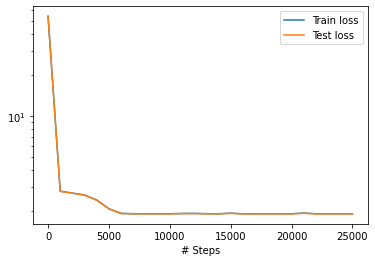

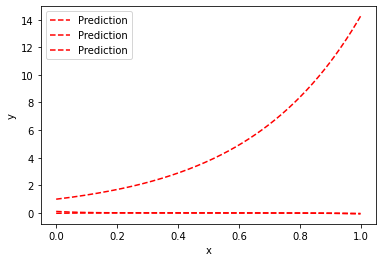

In [26]:
losshistory, train_state = model.train(epochs=25000)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [27]:
data = np.loadtxt( 'test.dat' )
#print(data[:,1])

/tmp/ipykernel_11537/2128343477.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


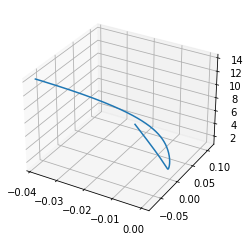

In [28]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(data[:, 1], data[:, 2], data[:, 3])
plt.draw()
plt.show()